In [1]:
# for local import
import sys
if "../../" not in sys.path:
    sys.path.append("../../")

In [2]:
# for working with data
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sns.set_style("whitegrid")
sns.set_palette("Set2")

# for exploration
from src.exploration import check_balance, distribution_barplot, distribution_otherbased

In [3]:
data = pd.read_csv("../../data/fake_reviews_dataset.csv")

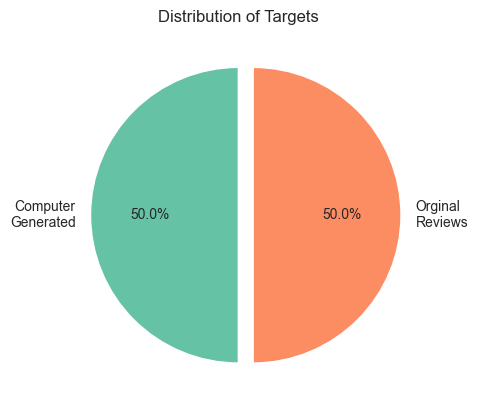

In [4]:
check_balance(data=data, target="label", chart_types="pie", normalize=True,
              target_labels={"CG": "Computer\nGenerated", "OR": "Orginal\nReviews"})

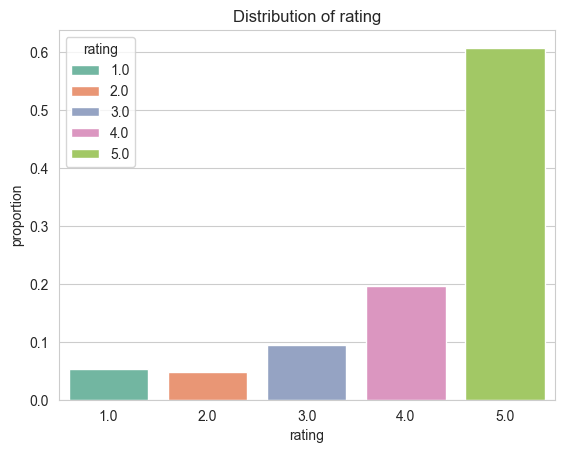

In [5]:
distribution_barplot(data=data, feature="rating")

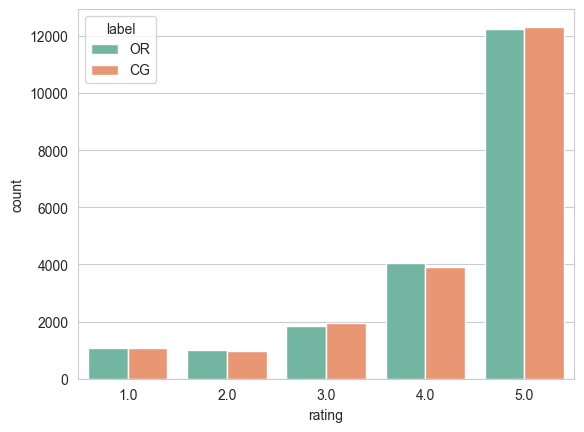

In [6]:
distribution_otherbased(data=data, dist_feature="label", base_feature="rating")

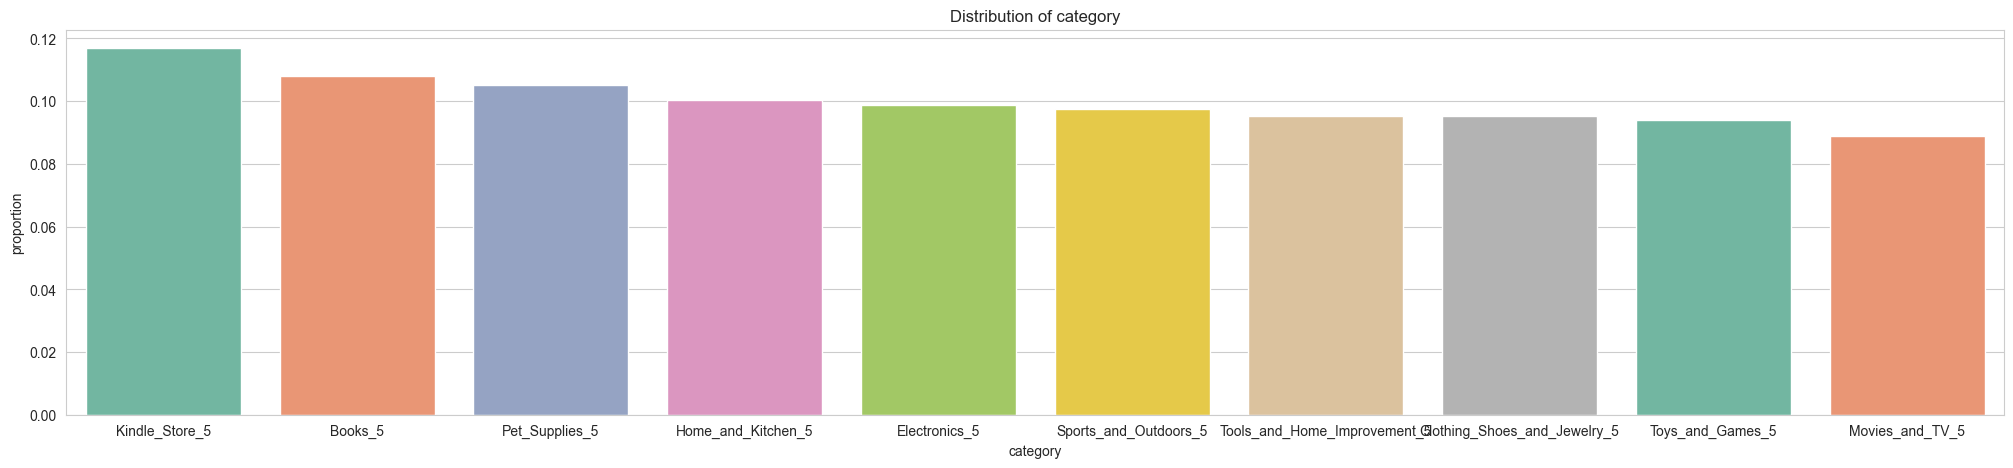

In [7]:
plt.figure(figsize=(25, 5))
distribution_barplot(data=data, feature="category")

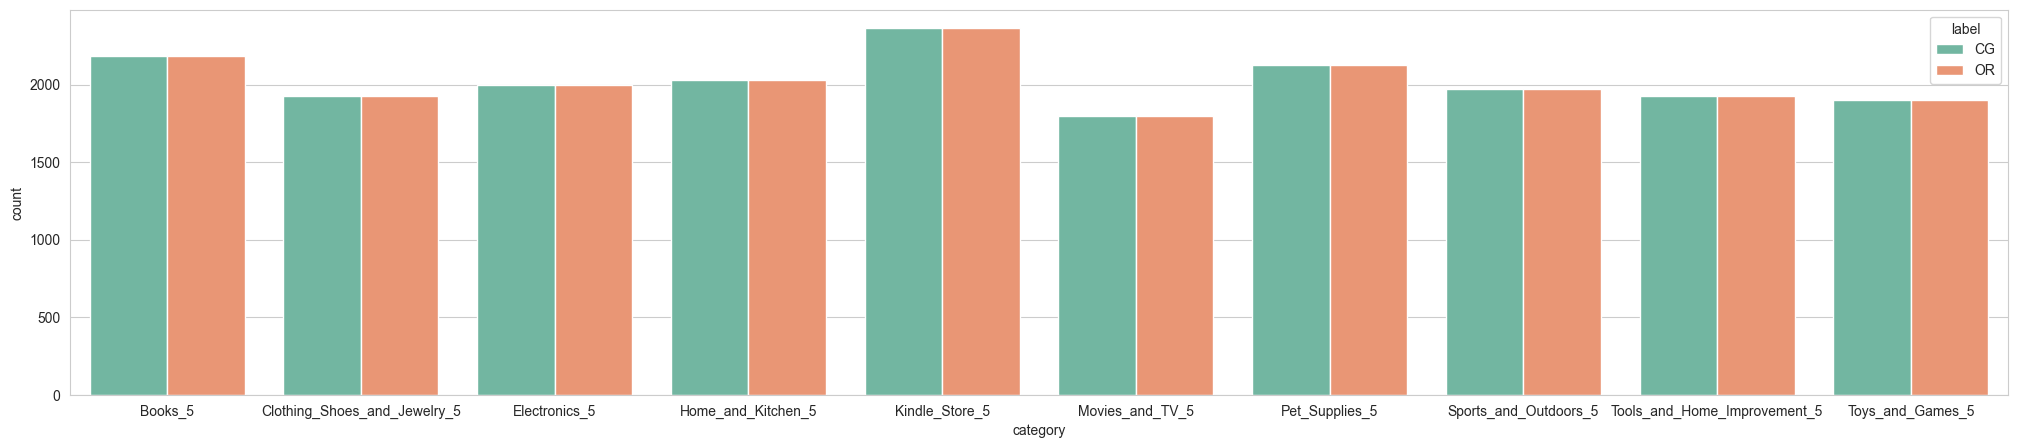

In [8]:
plt.figure(figsize=(25, 5))
distribution_otherbased(data=data, dist_feature="label", base_feature="category")

In [9]:
data["length"] = data["text_"].apply(lambda x: len(x))

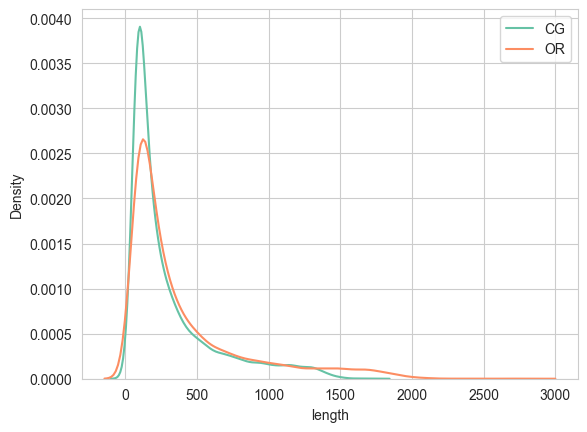

In [10]:
sns.kdeplot(data=data[data["label"]=="CG"]["length"], label="CG")
sns.kdeplot(data=data[data["label"]=="OR"]["length"], label="OR")
plt.legend()

<Axes: xlabel='length', ylabel='Density'>

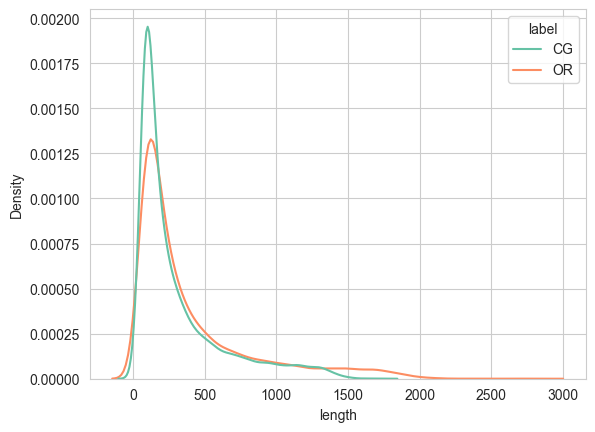

In [11]:
sns.kdeplot(data=data[["label", "length"]], x="length", hue="label", common_norm=True)

<Axes: xlabel='rating', ylabel='Density'>

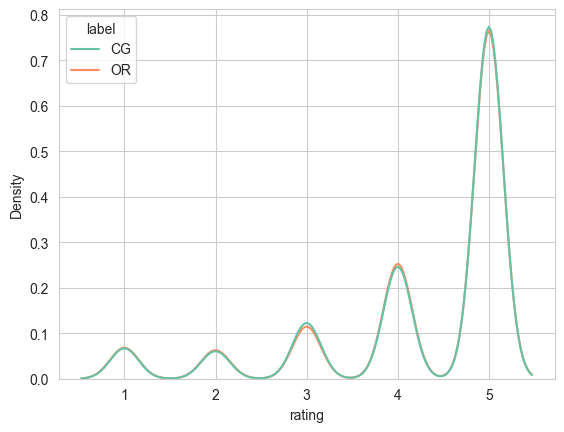

In [12]:
sns.kdeplot(data=data[["label", "rating"]], x="rating", hue="label", common_norm=True)

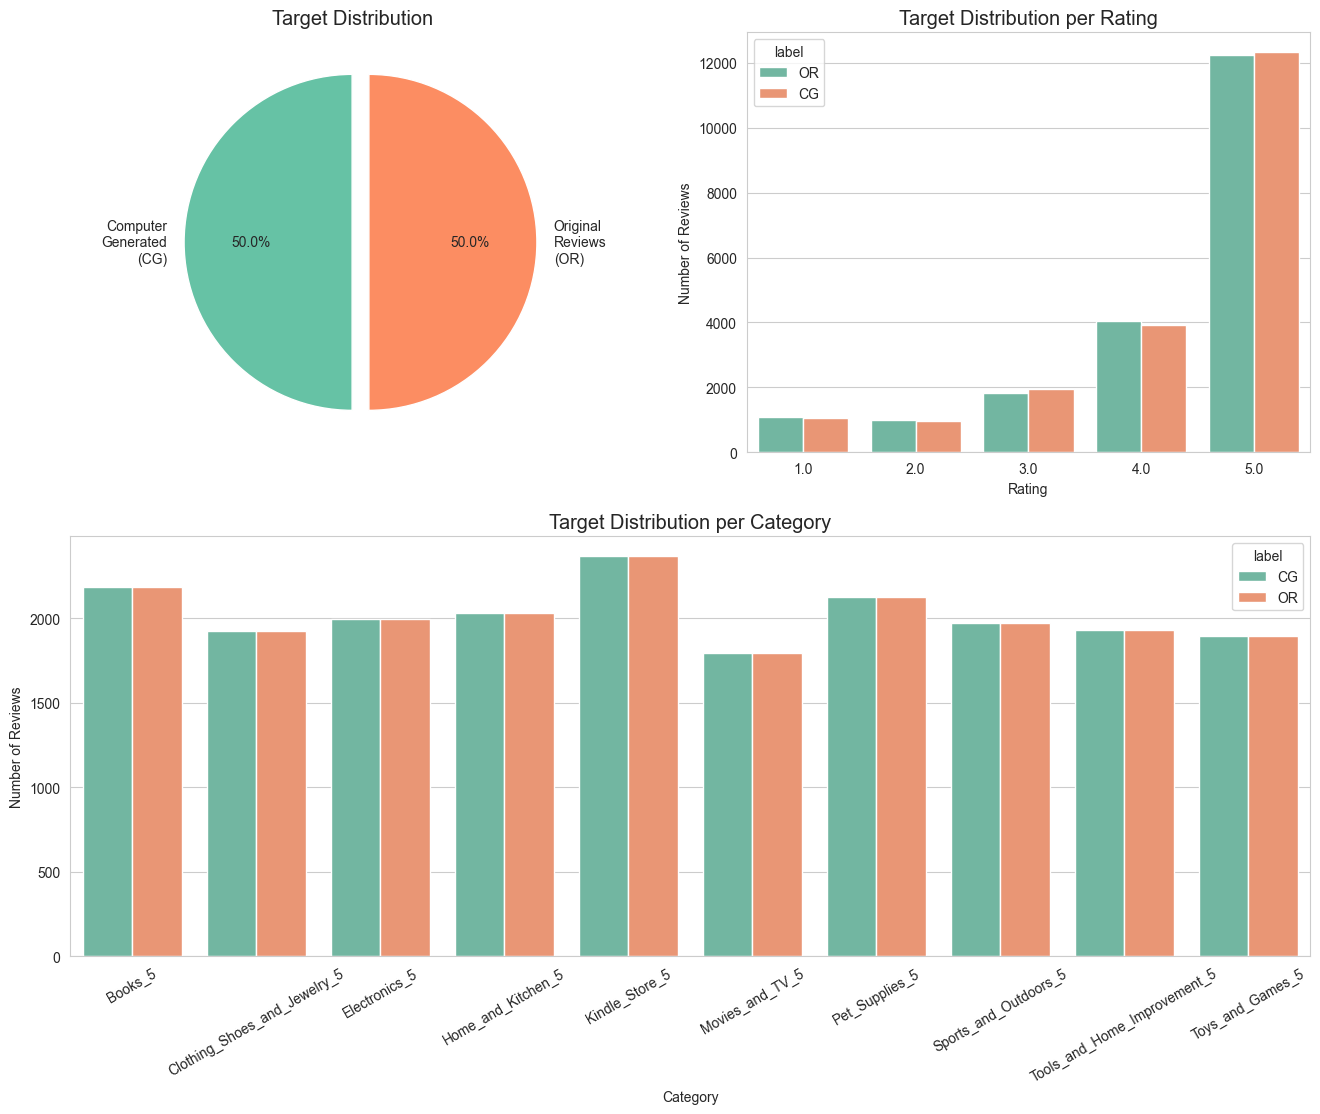

In [78]:
fig = plt.figure(figsize=(16, 12))

# Create a GridSpec with 2 rows and 2 columns
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# Add subplots
ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
ax3 = fig.add_subplot(gs[1, :])  # Second row, spans both columns

# target distribution
target_counts = data["label"].value_counts(normalize=True)
ax1.pie(target_counts.values, labels=["Computer\nGenerated\n(CG)", "Original\nReviews\n(OR)"], startangle=90, autopct="%1.1f%%", explode=[0, 0.1])
ax1.set_title("Target Distribution", fontsize="x-large")

# target distribution (per rating)
dist = data.groupby(by="rating", as_index=False)["label"].value_counts(normalize=False)
sns.barplot(x=dist["rating"], y=dist.iloc[:, -1], hue=dist["label"], ax=ax2)
ax2.set_title("Target Distribution per Rating", fontsize="x-large")
ax2.set_xlabel("Rating")
ax2.set_ylabel("Number of Reviews")

# target distribution (per rating)
dist = data.groupby(by="category", as_index=False)["label"].value_counts(normalize=False)
sns.barplot(x=dist["category"], y=dist.iloc[:, -1], hue=dist["label"], ax=ax3, )
ax3.set_title("Target Distribution per Category", fontsize="x-large")
ax3.set_xlabel("Category")
ax3.set_ylabel("Number of Reviews")
ax3.tick_params(axis="x", rotation=30)

Text(0.5, 1.0, 'Length Reviews Distribution per Target')

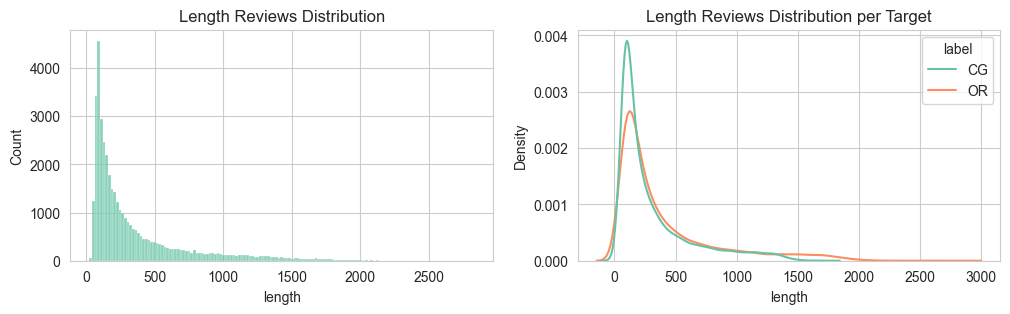

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

sns.histplot(data=data["length"], ax=ax[0])
ax[0].set_title("Length Reviews Distribution")

sns.kdeplot(data=data[["label", "length"]], x="length", hue="label", ax=ax[1], common_norm=False)
ax[1].set_title("Length Reviews Distribution per Target")